# Greenpeace International Insights Team

## Facebook report 2017

Built using [Jupyter Lab](https://jupyterlab.readthedocs.io/en/latest/), a Python framework for working with data.

Data source from the Google Spreadsheet [FB Analysis 2017](https://docs.google.com/spreadsheets/d/13mGoZBTZ7PvzOwFNYZCFe8L1q5ICSexD-sUrcfEp6k4/edit#gid=1739593191) and imported here as csv with corrections made for column headers and index seat to NRO names.

__This document is using live data and is editable but you can't save your work here.__

Please play and experiment as much as you want but changes will need to be submitted back to the Git repository currently hosted at <https://github.com/gyaresu/insights>

<gareth@greenpeace.org>

Help on function set_style in module seaborn.rcmod:

set_style(style=None, rc=None)
    Set the aesthetic style of the plots.
    
    This affects things like the color of the axes, whether a grid is
    enabled by default, and other aesthetic elements.
    
    Parameters
    ----------
    style : dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
        A dictionary of parameters or the name of a preconfigured set.
    rc : dict, optional
        Parameter mappings to override the values in the preset seaborn
        style dictionaries. This only updates parameters that are
        considered part of the style definition.
    
    Examples
    --------
    >>> set_style("whitegrid")
    
    >>> set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    
    See Also
    --------
    axes_style : return a dict of parameters or use in a ``with`` statement
                 to temporarily set the style.
    set_context : set parameters to scale plot elements


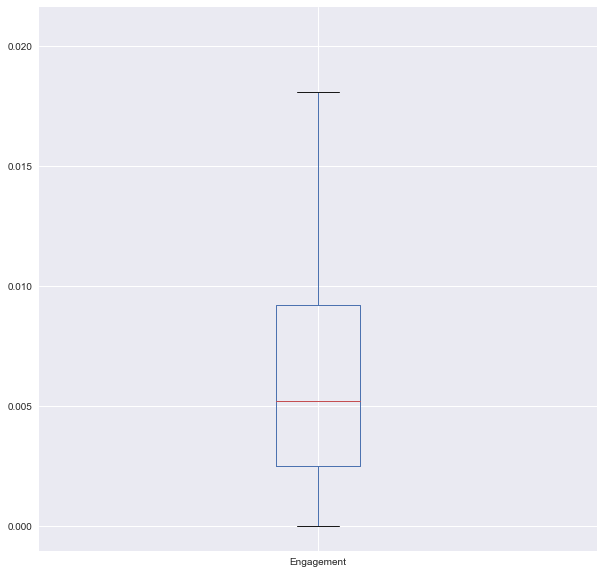

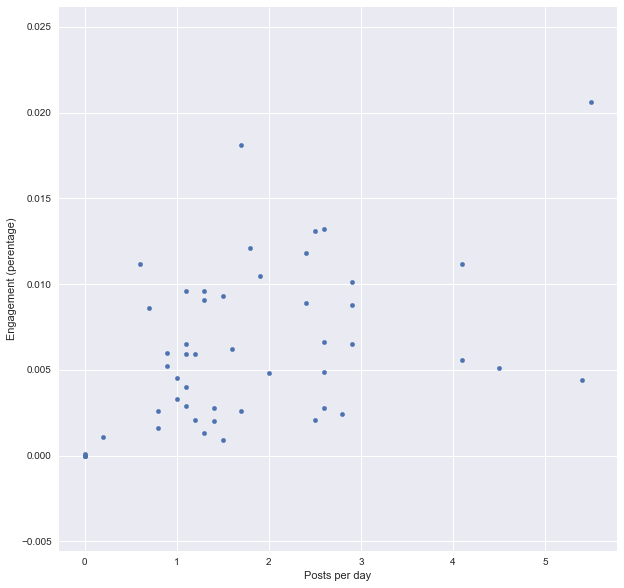

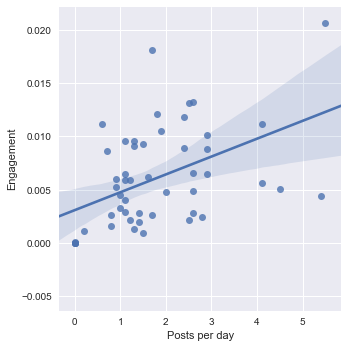

In [117]:
import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Google Spreadsheet: "Fb Analysis 2017"
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS31wVJrsgO_dxqgvDQipkdySgF3cMfP9M3fhnce5bcGutq_I_q0M7cAwyLwGGifvJm4epJoXfXmxat/pub?output=csv'

# Read the file as a CSV. Set the correct row and columns for headers and index.
# Tell Pandas that the columns with numbers are using commas for separators.
df = pd.read_csv(url, encoding = 'utf8', header=3, index_col = 'Page', thousands=',')

# Get rid of the random empty column
df = df.drop(columns=['Unnamed: 0'], axis=1)

# Convert the percentages (30%) to decimal (0.03)
df['Page Performance Index'] = df['Page Performance Index'].str.rstrip('%').astype('float') / 100.0
df['Growth (rate)'] = df['Growth (rate)'].str.rstrip('%').astype('float') / 100.0
df['Engagement'] = df['Engagement'].str.rstrip('%').astype('float') / 100.0
df['Weighted Engagement'] = df['Weighted Engagement'].str.rstrip('%').astype('float') / 100.0
df['Post interaction'] = df['Post interaction'].str.rstrip('%').astype('float') / 100.0

# For testing: Show the types of each column
#df.dtypes

# For testing: Show the first 5 rows
#df.head(5)

# Set the plot image size for both the following Box & Scatter
fig_size = [10,10]
plt.rcParams["figure.figsize"] = fig_size

# Box plot
df.plot(kind='box', x='Posts per day', y='Engagement', logy=False, logx=False)#, s='Number of fans')

# Scatter plot
df.plot(kind='scatter', x='Posts per day', y='Engagement', logy=False, logx=False)#, s='Number of fans')
plt.ylabel('Engagement (perentage)')
plt.xlabel('Posts per day')

# Set the seaborn plot image size.
# Make the elements all larger with 'poster' style
sns.set_context("poster")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Seaborn scatter plot
sns.lmplot(x='Posts per day', y='Engagement', data=df)
plt.show()


# Playing with the data set

In [12]:
# What are the data types of each column? Are then any Null values?
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Greenpeace UK to Greenpeace Cambodia
Data columns (total 13 columns):
Page Performance Index    51 non-null float64
Number of fans            51 non-null int64
Growth (rate)             51 non-null float64
Growth (absolute)         51 non-null int64
Engagement                51 non-null float64
Weighted Engagement       51 non-null float64
Post interaction          51 non-null float64
Response time             50 non-null object
Posts per day             51 non-null float64
Total reach               51 non-null int64
Total reach (organic)     51 non-null int64
Total reach (viral)       51 non-null int64
Total reach (paid)        51 non-null int64
dtypes: float64(6), int64(6), object(1)
memory usage: 8.1+ KB


In [4]:
# Show the first 5 rows
df.head(5)

,Page Performance Index,Number of fans,Growth (rate),Growth (absolute),Engagement,Weighted Engagement,Post interaction,Response time,Posts per day,Total reach,Total reach (organic),Total reach (viral),Total reach (paid)
Page,,,,,,,,,,,,,
Greenpeace UK,0.35,670045,0.129,86103,0.0206,0.0312,0.0037,21.4,5.5,288883776,66340536,149248153,88618920
Greenpeace Polska,0.53,190284,0.300,57037,0.0181,0.0360,0.0105,17.8,1.7,86449332,19472831,60607282,8640684
Greenpeace 綠色和平 - 香港網站 Hong Kong,0.27,169781,0.125,21142,0.0132,0.0172,0.0051,-,2.6,61286002,13811989,20518967,30161031
Greenpeace Norge,0.33,29944,0.172,5159,0.0131,0.0163,0.0053,74.8,2.5,7024287,2143136,3915165,1375803
Greenpeace Österreich - Austria,0.34,103863,0.204,21168,0.0121,0.0208,0.0066,16.2,1.8,55004589,8584537,27970560,21530253


In [5]:
# What about if we add up the total reach of every NRO?
summed = df['Total reach'].sum()

# And then format the number to use comma separators
print("{:,}".format(summed))

# Incredible!
print("Over 4 Billion acts of courage! Zomg!!!")

4,355,410,640
Over 4 Billion acts of courage! Zomg!!!


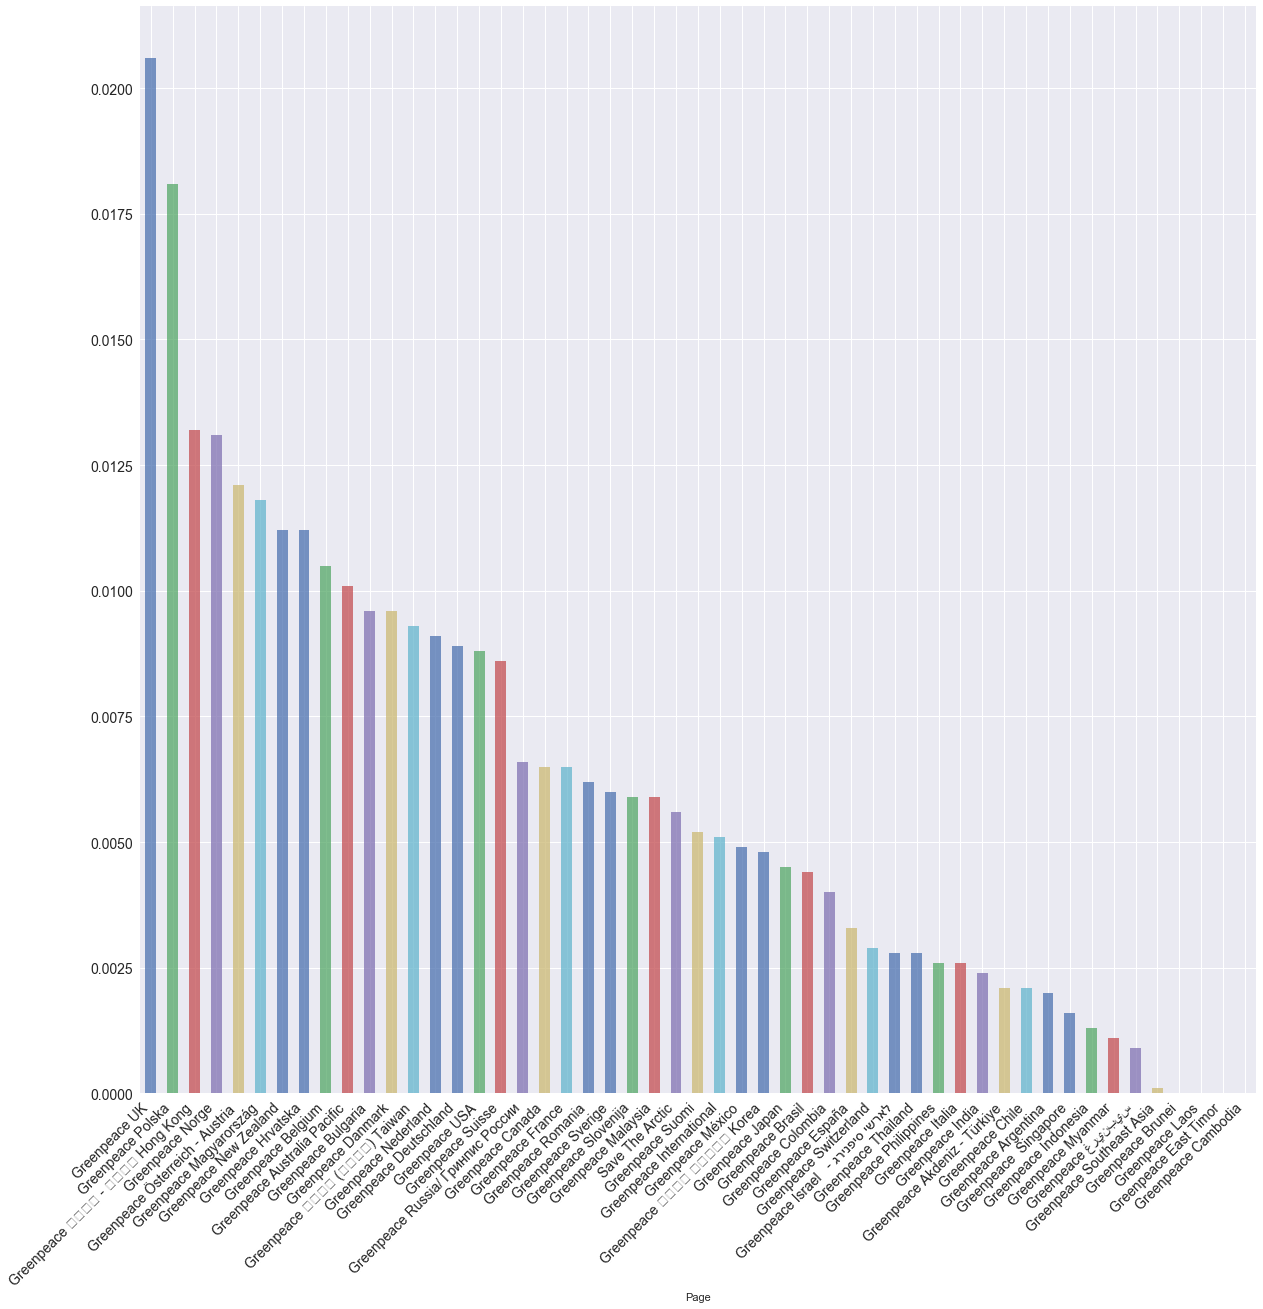

In [108]:
# Set the plot image size
fig_size = [20,20]
plt.rcParams["figure.figsize"] = fig_size

# Make the top of the NRO names line up with its bar
plt.xticks(rotation=45, ha='right')

# We change the fontsize of the 'ticks' labels
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=8)

# Generate the plot
df['Engagement'].plot(kind='bar', alpha=0.75, rot=45)

#TODO – Fix unicode fonts